# Nuvem de palavras

A seguir foram feitas nuvens de palavras para algumas das categorias com mais ocorrência dentro do Dataset. Essas categorias estão no primeiro e segundo níveis de hierarquia. A nuvem de palavras dessa biblioteca considera bigramas na contabilização de termos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
import re

#Descomente a linha abaixo caso precise da lista de stopwords
# nltk.download('stopwords')

df_hate_speech = pd.read_csv("2021-07-20_portuguese_hate_speech_hierarchical_classification.csv",delimiter=";")

In [2]:
df_hate_speech

,text,Hate.speech,Sexism,Body,Racism,Ideology,Homophobia,Origin,Religion,Health,OtherLifestyle,Migrants,Ageing
0,"""não come mel, morde marimbondo""",0,0,0,0,0,0,0,0,0,0,0,0
1,"não tem pinto, tem orgulho !",0,0,0,0,0,0,0,0,0,0,0,0
2,Não vê essa merda de Crepúsculo! Pra isso temo...,0,0,0,0,0,0,0,0,0,0,0,0
3,"não da tapa na bundinha, da cotovelada nas cos...",0,0,0,0,0,0,0,0,0,0,0,0
4,o diminutivo INHO não acompanha a trajetória d...,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,Na minha sala só tem viado e sapatão e a cois...,1,0,0,0,0,1,0,0,0,0,0,0
5664,PARABENS SAPATÃO SDDS @attomiter https://t.co/...,1,0,0,0,0,1,0,0,0,0,0,0
5665,RT @toquedeveludo: Agora um poema:\nEu sou sap...,1,0,0,0,0,1,0,0,0,0,0,0
5666,O mundo das sapatao é mais ligado do que eu im...,1,0,0,0,0,1,0,0,0,0,0,0


Nuvem de palavras contendo discurso de ódio:
Nuvem de palavras contendo sem discurso de ódio:
Nuvem de palavras contendo sexismo:
Nuvem de palavras contendo racismo:
Nuvem de palavras contendo homofobia:
Nuvem de palavras contendo body shaming:


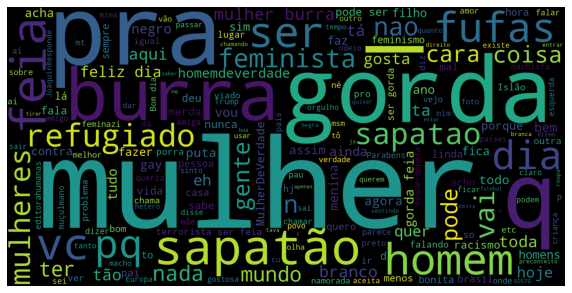

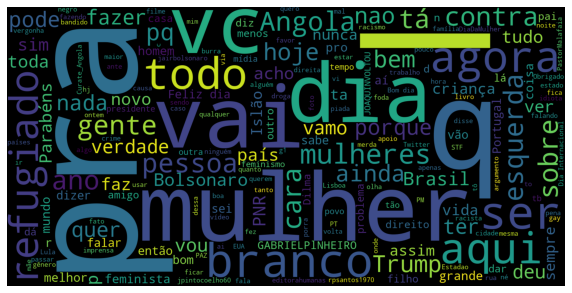

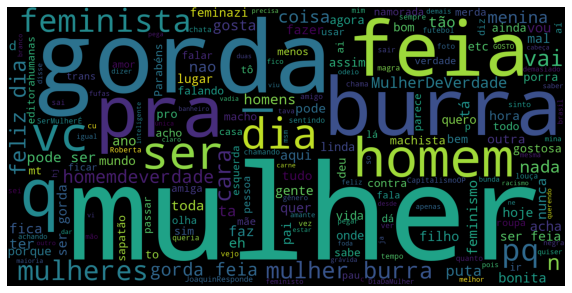

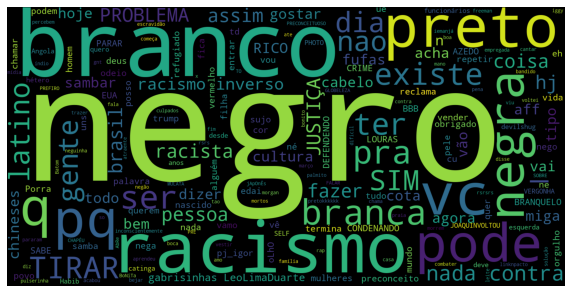

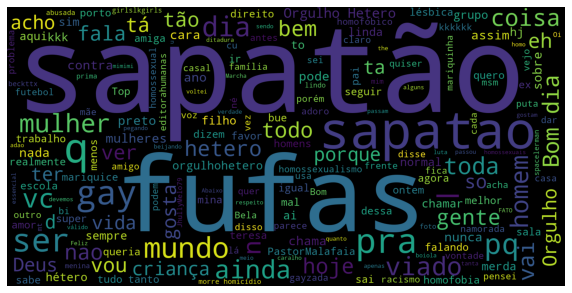

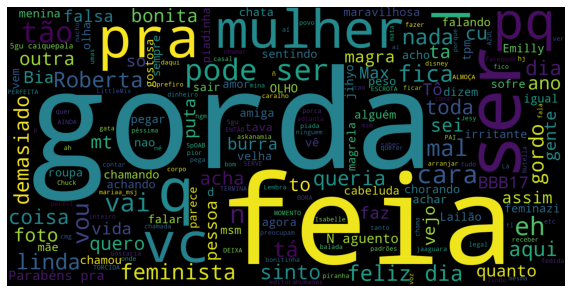

In [3]:
# concatenar as palavras
all_comments = " ".join(text for text in df_hate_speech["text"] if len(text)>2)
all_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', all_comments, flags=re.MULTILINE)
all_comments = re.sub(r'RT\s','', all_comments, flags=re.MULTILINE)

all_hashtags = ""
for comment in df_hate_speech["text"]:
    for word in comment.split(" "):
        if word != "":
            if(word[0] == "#"):
                all_hashtags += " " + word

df_hs = df_hate_speech[df_hate_speech["Hate.speech"]==1]
hatespeech_comments = " ".join(text for text in df_hs["text"] if len(text)>2)
hatespeech_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', hatespeech_comments, flags=re.MULTILINE)
hatespeech_comments = re.sub(r'RT\s','', hatespeech_comments, flags=re.MULTILINE)

df_hs = df_hate_speech[df_hate_speech["Hate.speech"]==0]
nhatespeech_comments = " ".join(text for text in df_hs["text"] if len(text)>2)
nhatespeech_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', nhatespeech_comments, flags=re.MULTILINE)
nhatespeech_comments = re.sub(r'RT\s','', nhatespeech_comments, flags=re.MULTILINE)

df_sx = df_hate_speech[df_hate_speech["Sexism"]==1]
sexism_comments = " ".join(text for text in df_sx["text"] if len(text)>2)
sexism_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', sexism_comments, flags=re.MULTILINE)
sexism_comments = re.sub(r'RT\s','', sexism_comments, flags=re.MULTILINE)

df_rc = df_hate_speech[df_hate_speech["Racism"]==1]
racism_comments = " ".join(text for text in df_rc["text"] if len(text)>2)
racism_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', racism_comments, flags=re.MULTILINE)
racism_comments = re.sub(r'RT\s','', racism_comments, flags=re.MULTILINE)

df_hm = df_hate_speech[df_hate_speech["Homophobia"]==1]
homophobia_comments = " ".join(text for text in df_hm["text"] if len(text)>2)
homophobia_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', homophobia_comments, flags=re.MULTILINE)
homophobia_comments = re.sub(r'RT\s','', homophobia_comments, flags=re.MULTILINE)

df_bd = df_hate_speech[df_hate_speech["Body"]==1]
body_comments = " ".join(text for text in df_bd["text"] if len(text)>2)
body_comments = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', body_comments, flags=re.MULTILINE)
body_comments = re.sub(r'RT\s','', body_comments, flags=re.MULTILINE)

comments_list = [("discurso de ódio:",hatespeech_comments), ("sem discurso de ódio:",nhatespeech_comments), ("sexismo:",sexism_comments), ("racismo:",racism_comments), ("homofobia:",homophobia_comments), ("body shaming:",body_comments)]

for comment in comments_list:

    wordcloud = WordCloud(stopwords=stopwords.words('portuguese'),
                          background_color="black",
                          width=1600, height=800).generate(comment[1])

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    
    print("Nuvem de palavras contendo " + comment[0])
    plt.imshow(wordcloud);
    # wordcloud.to_file("hate_speech_wordcloud.png")

O dataset não apresentou número considerável de relatos e citações (ex. #MeToo), o que faz com que o conteúdo seja de ódio direcionado. Ocorre predominância do feminino e de questões políticas, como o contexto das eleições em 2017 (data da coleta) e conflito migratório com Angolanos em Portugal (https://www.dn.pt/portugal/um-em-cada-tres-vistos-emitidos-por-portugal-em-2017-foi-para-angolanos-9064927.html).

# Avaliação - modelo de hierarquia com 2 níveis

Abaixo será feita a classificação com base nos 2 primeiros níveis de hierarquia, utilizando média de embeddings e bag of words com TFxIdf. 

Teste somente Hate.Speech: embeddings entre 60 e 62% de F1 - palavras chave, com e sem stopwords; BoW simples com 79.5%.

Teste com hierarquia e PCA: ----

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from competicao_am.metodo_competicao import MetodoCompeticaoHierarquico
from competicao_am.preprocessamento_atributos_competicao import gerar_atributos_letra_musica

df_lyrics = pd.read_csv("datasets/lyrics_amostra.csv")

#remove id
df_lyrics.drop("id",axis=1)


#separa em treino e validacao
df_treino = df_lyrics.sample(frac=0.7,random_state=2)
df_validacao = df_lyrics.drop(df_treino.index)


#cria o metodo de ap de maquina 
scikit_method = RandomForestClassifier(random_state=2,class_weight='balanced',n_estimators=10)
#no método de competição hierarquico, temos que passar como parametro qual é a classe do primeiro nivel tb
ml_method = MetodoCompeticaoHierarquico(scikit_method,"grouped_genre")

result = ml_method.eval(df_treino,df_validacao,"genre",seed=2)

print("====== Resultado primeiro Nivel ====")
result_prim_nivel = ml_method.result_prim_nivel
print(f"Macro F1: {result_prim_nivel.macro_f1}")
print(result_prim_nivel.mat_confusao)
print(ml_method.obj_class_prim_nivel.dic_int_to_nom_classe)
print(classification_report(result_prim_nivel.y, result_prim_nivel.predict_y))

print("\n\n====== Resultado segundo nivel =====")
print(f"Macro F1: {result.macro_f1}")
print(result.mat_confusao)
print(ml_method.obj_class_final.dic_int_to_nom_classe)

print(classification_report(result.y, result.predict_y))

# reset para liberar memória
%reset -f
# fim do reset para liberar memória

from embeddings.utils import get_embedding, KDTreeEmbedding
from sklearn.decomposition import PCA

emotion_words = {
                    "pride":{"proud"},
                    "elation":{"ecstatic", "euphoria", "exaltation", "exhilarating"},#vs boredom
                    "happiness":{"joy","cheer", "bliss", "delight", "enjoy", "happy"},#vs sad
                    "satisfaction":{"comfortable","contentment"},#
                    "relief":{},
                    "hope":{"buoyancy", "confident", "faith", "optimistic"},
                    "interest":{"alert", "animation", "ardor", "curious","enthusiasm"},
                    "surprise":{"amazed", "astonishing", "dumbfounded","thunderstruck"},
                    "anxiety":{"anguish","anxiety","apprehensive","jittery","nervous","worry"},
                    "sadness":{"chagrin", "dejected", "gloom", "hopeless", "melancholy", "sad", "tear"},
                    "boredom":{"ennui","indifference","tedious"},
                    "shame":{"abashed", "ashamed", "embarrassing", "humiliating"},
                    "guilt":{"blame", "contrition", "remorse"},
                    "disgust":{"abhor", "aversion", "dislike", "disrelish", "nausea","sick"},
                    "contempt":{"denigration","depreciate","derision","disdain","scorn"},
                    "hostile":{},
                    "anger":{"anger","angry","furious","fury","incense","infuriating",
                                "mad","rage","resent","temper","wrath"},
                    "recognition":{"respect","acknowledgement"}
            }
dict_embedding = get_embedding("glove.pt.100.txt")

kdtree_embedding = KDTreeEmbedding(dict_embedding, "kdt_pt.p")

#obtem as stopwords
stop_words = set()
with open("datasets/stopwords.txt") as stop_file:
    stop_words = set(stop_word[:-1] for stop_word in stop_file)


#palavras chaves a serem consideradas
set_vocabulary = set()
for key_word, arr_related_words in emotion_words.items():
    set_vocabulary.add(key_word)
    set_vocabulary = set_vocabulary | set(arr_related_words)

#kdtree - para gerar o conjunto com palavras chaves e suas similares
vocabulary_expanded = []
for word in set_vocabulary:
    _, words = kdtree_embedding.get_most_similar_embedding(word,60)
    vocabulary_expanded.extend(words)
vocabulary_expanded = set(vocabulary_expanded)

import optuna
from embeddings.avaliacao_embedding import calcula_experimento_representacao, OtimizacaoObjetivoRandomForest

# Método de aprendizado de máquina a ser usado
dict_metodo = {"random_forest":{"classe_otimizacao":OtimizacaoObjetivoRandomForest,
                                "sampler":optuna.samplers.TPESampler(seed=1, n_startup_trials=10)},
              }
df_amazon_reviews = pd.read_csv("2019-05-28_portuguese_hate_speech_hierarchical_classification.csv",delimiter=",")

#executa experimento com a representacao determinada e o método
for metodo, param_metodo in dict_metodo.items():
    for representation in arr_representations:
        print(f"===== Representação: {representation.nome}")
        col_classe = "Hate.speech"
        num_folds = 5
        num_folds_validacao = 3
        num_trials = 100


        nom_experimento = f"{metodo}_"+representation.nome
        experimento = calcula_experimento_representacao(nom_experimento,representation,df_amazon_reviews,
                                            col_classe,num_folds,num_folds_validacao,num_trials,
                                            ClasseObjetivoOtimizacao=param_metodo['classe_otimizacao'],
                                                sampler=param_metodo['sampler'])
        print(f"Representação: {representation.nome} concluida")